In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("../data/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
df.tail()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.01570,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.00017,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.00769,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.00285,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
6990,FALSE POSITIVE,0,0,1,1,4.856035,6.360000e-05,-6.360000e-05,135.993300,0.01080,...,-225,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

# Select your features (columns)

In [5]:
# Set features. This will also be used as x values.
target = df["koi_disposition"]
target_names = ['CANDIDATE','CONFIRMED','FALSE POSITIVE']
features = df.drop("koi_disposition", axis=1)
feature_names=features.columns

# Create a Train Test Split

Use `koi_disposition` for the y values

In [6]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(target)
encoded_y = label_encoder.transform(target)
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

In [7]:
# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, encoded_y, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(features, one_hot_y, random_state=42)
X_train.shape, y_train.shape

((5243, 40), (5243,))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
 # Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_train_scaled, y_train)

1.0

In [11]:
importances = rf.feature_importances_
rf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
rf_ranked_feature=[a[1] for a in rf_feature_importance]
rf_ranked_feature[:10]

['koi_fpflag_co',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_prad',
 'koi_fpflag_ec',
 'koi_duration_err2',
 'koi_steff_err1',
 'koi_prad_err2',
 'koi_duration_err1']

In [12]:
import numpy as np
rf_ranked_list=np.argsort(np.flip(importances))
rf_ranked_list[:10]
# X_train_scaled=X_train_scaled[:,rf_ranked_list[:10]]

array([12,  3,  8,  7,  5, 11,  6,  0, 28, 27], dtype=int64)

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_train_scaled, y_train)

1.0

In [14]:
importances = clf.feature_importances_
clf_feature_importance=sorted(zip(importances, feature_names), reverse=True)
clf_ranked_feature=[a[1] for a in clf_feature_importance]
clf_ranked_feature[:10]

['koi_fpflag_nt',
 'koi_fpflag_co',
 'koi_fpflag_ss',
 'koi_model_snr',
 'koi_fpflag_ec',
 'koi_impact',
 'dec',
 'koi_srad_err1',
 'koi_time0bk',
 'koi_prad']

# Train the Model



k: 1, Train/Test Score: 1.000/0.790
k: 3, Train/Test Score: 0.897/0.811
k: 5, Train/Test Score: 0.878/0.820
k: 7, Train/Test Score: 0.866/0.823
k: 9, Train/Test Score: 0.856/0.828
k: 11, Train/Test Score: 0.848/0.828
k: 13, Train/Test Score: 0.849/0.822
k: 15, Train/Test Score: 0.841/0.824
k: 17, Train/Test Score: 0.838/0.827
k: 19, Train/Test Score: 0.836/0.824


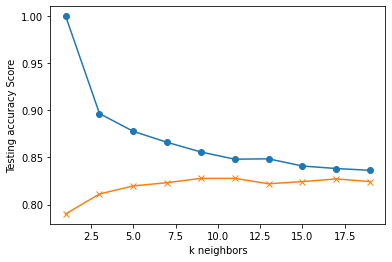

In [15]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
predictions = knn.predict(X_test_scaled)

print(f"k = 19: Training Data Score: {knn.score(X_train_scaled, y_train):.5f}")
print(f"k = 19: Testing Data Score: {knn.score(X_test_scaled, y_test):.5f}")

k = 19: Training Data Score: 0.83635
k = 19: Testing Data Score: 0.82437


In [17]:
from sklearn.metrics import classification_report
predictions = knn.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=list(label_encoder.inverse_transform([0,1,2]))))

                precision    recall  f1-score   support

     CANDIDATE       0.69      0.52      0.59       411
     CONFIRMED       0.66      0.78      0.72       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.82      1748
     macro avg       0.78      0.76      0.76      1748
  weighted avg       0.82      0.82      0.82      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [18]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,17,19],
             'weights':['uniform','distance']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=3)

In [19]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.827 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.803 total time=   0.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.800 total time=   0.0s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.805 total time=   0.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.807 total time=   0.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.827 total time=   0.0s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.804 total time=   0.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.799 total time=   0.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.807 total time=   0.0s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.808 total time=   0.0s
[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.825 total time=   0.0s
[CV 2/5] END ....n_neighbors=5, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [20]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 19, 'weights': 'distance'}
0.822617323659756


In [21]:
from sklearn.metrics import classification_report
predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=list(label_encoder.inverse_transform([0,1,2]))))

                precision    recall  f1-score   support

     CANDIDATE       0.68      0.53      0.60       411
     CONFIRMED       0.67      0.77      0.72       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.83      1748
     macro avg       0.78      0.77      0.77      1748
  weighted avg       0.82      0.83      0.82      1748



# Save the Model

In [22]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn_model.sav'
joblib.dump(knn, filename)

['knn_model.sav']